In [4]:
import numpy as np 
import pandas as pd 
import cv2 as cv
import matplotlib.pyplot as plt 
import os
datasetfolder='Pomegranate Diseases Dataset'


In [5]:
numberofclasses=os.listdir(datasetfolder)
print(numberofclasses)

['Alternaria', 'Anthracnose', 'Bacterial_Blight', 'Cercospora', 'Healthy']


(3120, 3120, 3)


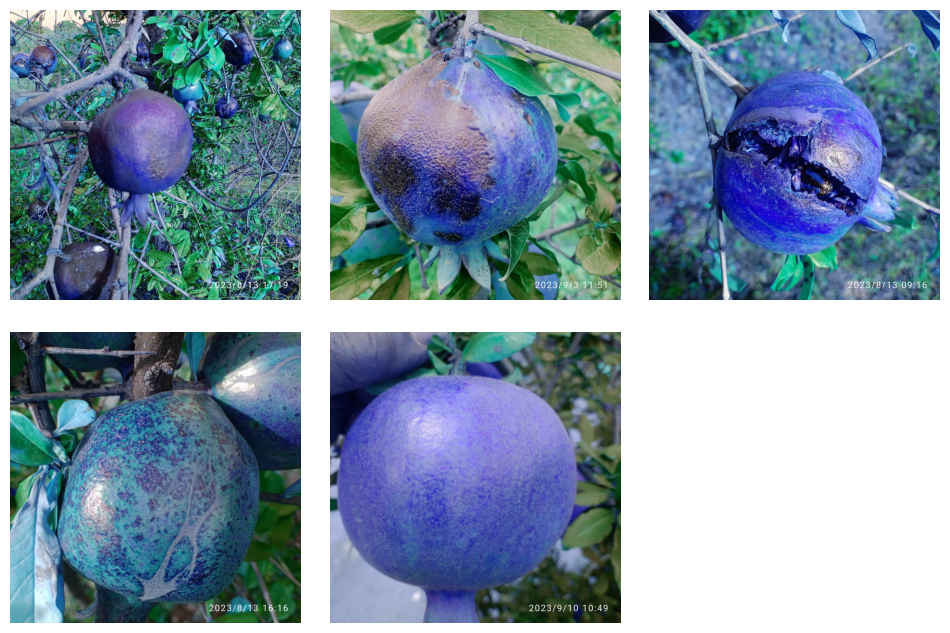

In [6]:
import random as rd 
rdimages=[]
for j,i in enumerate(numberofclasses):
    
    randomimage=datasetfolder+'/'+i+'/'+rd.choice(os.listdir(datasetfolder+'/'+i))
    rdimages.append(cv.imread(randomimage))
print(rdimages[0].shape)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
# Iterate over the images and plot them
for i, ax in enumerate(axes.flat):
    if i < len(rdimages):
        ax.imshow(rdimages[i])
        ax.axis('off')
    else:
        # If there are fewer images than subplots, hide the extra subplots
        ax.set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()

In [21]:
imagedata = []
imagelabel = []
for i, j in enumerate(numberofclasses):
    imagepath = datasetfolder + '/' + j
    images = os.listdir(imagepath)
    for k in images:
        image_path = os.path.join(imagepath, k)
        resizing=cv.resize(cv.imread(image_path),(250,250))
        image = np.array(resizing, dtype=np.float32)
        imagedata.append(image)
        imagelabel.append(i)

imagedata = np.array(imagedata)
imagelabel = np.array(imagelabel)

print(imagedata.shape)
print(imagelabel.shape)

(5099, 250, 250, 3)
(5099,)


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(imagedata,imagelabel,random_state=42,test_size=0.2,shuffle=True)
xtrain=xtrain/250
xtest=xtest/250
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4079, 250, 250, 3)
(1020, 250, 250, 3)
(4079,)
(1020,)
